In [27]:
import os
from time import time
from tqdm import tqdm
import numpy

from keras.preprocessing.image import ImageDataGenerator
import torch
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.utils.data import random_split

import torchvision
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18
from torchvision.transforms import transforms


# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
tfm = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [29]:
TRAIN_ROOT = 'data/train'
#TEST_ROOT = 'data/val'


train_ds = ImageFolder(TRAIN_ROOT, transform=tfm)
#test_ds = ImageFolder(TEST_ROOT, transform=tfm)
val_size = int(0.2*len(train_ds))
train_size = len(train_ds)- val_size
train_data, val_data = random_split(train_ds, [train_size, val_size])
valloader = DataLoader(val_data, batch_size=64,shuffle=True)


In [7]:
LEN_TRAIN = len(train_ds)

In [8]:
print(LEN_TRAIN)

3726


In [9]:
print(train_ds.class_to_idx)

{'christmas_cookies': 0, 'christmas_presents': 1, 'christmas_tree': 2, 'fireworks': 3, 'penguin': 4, 'reindeer': 5, 'santa': 6, 'snowman': 7}


In [30]:
train_loader = DataLoader(train_ds, batch_size = 64, shuffle=True)
valloader = DataLoader(val_data, batch_size=64,shuffle=True)

In [16]:
model = resnet18(pretrained=True)
# Replace Output of Fully Connected Layer with Number of Labels for our Classification Problem
model.fc = Linear(in_features=512, out_features=8)
model = model.to(device)
model = model.cuda()    # only if your system supports Nvidia CUDA

AssertionError: Torch not compiled with CUDA enabled

In [15]:
!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\Users\\jeeva\\Python\\Lib\\site-packages\\~orch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 2.4/2.4 GB 392.6 kB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 9.3 MB/s eta 0:00:00
     ------------------------------------ 336.6/336.6 kB 870.3 kB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0
    Uninstalling torch-1.13.0:
      Successfully uninstalled torch-1.13.0


In [17]:
optimiser = Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)
loss_fn = CrossEntropyLoss()

In [22]:
for epoch in range(10):
    start = time()
    
    tr_acc = 0
    test_acc = 0
    
    # Train
    model.train()
    
    with tqdm(train_loader, unit="batch") as tepoch:
        for xtrain, ytrain in tepoch:
            optimiser.zero_grad()
            
            xtrain = xtrain.to(device)
            train_prob = model(xtrain)
            train_prob = train_prob.cpu()
            
            loss = loss_fn(train_prob, ytrain)
            loss.backward()
            optimiser.step()
            
            # training ends
            
            train_pred = torch.max(train_prob, 1).indices
            tr_acc += int(torch.sum(train_pred == ytrain))
            
        ep_tr_acc = tr_acc / LEN_TRAIN
    
    # Evaluate
#     model.eval()
#     with torch.no_grad():
#         for xtest, ytest in test_loader:
#             xtest = xtest.to(device)
#             test_prob = model(xtest)
#             test_prob = test_prob.cpu()
            
#             test_pred = torch.max(test_prob,1).indices
#             test_acc += int(torch.sum(test_pred == ytest))
            
#         ep_test_acc = test_acc / LEN_TEST
    
    end = time()
    duration = (end - start) / 60
    
    print(f"Epoch: {epoch}, Time: {duration}, Loss: {loss}\nTrain_acc:{ep_tr_acc}")

100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:37<00:00, 12.84s/batch]


Epoch: 0, Time: 12.625169781843821, Loss: 1.1440733671188354
Train_acc:0.9197530864197531


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:12<00:00, 12.41s/batch]


Epoch: 1, Time: 12.205950013796489, Loss: 0.09223825484514236
Train_acc:0.943370907139023


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:10<00:00, 12.37s/batch]


Epoch: 2, Time: 12.167494881153107, Loss: 0.20789673924446106
Train_acc:0.9600107353730543


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:13<00:00, 12.44s/batch]


Epoch: 3, Time: 12.23235474427541, Loss: 0.3120841085910797
Train_acc:0.9618894256575417


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:34<00:00, 12.79s/batch]


Epoch: 4, Time: 12.580614984035492, Loss: 0.030112722888588905
Train_acc:0.9648416532474503


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [11:52<00:00, 12.08s/batch]


Epoch: 5, Time: 11.88198341925939, Loss: 0.030064310878515244
Train_acc:0.9785292538915727


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:14<00:00, 12.46s/batch]


Epoch: 6, Time: 12.249812877178192, Loss: 0.17113743722438812
Train_acc:0.9844337090713903


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:07<00:00, 12.33s/batch]


Epoch: 7, Time: 12.122542333602905, Loss: 0.19434396922588348
Train_acc:0.9766505636070854


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [12:06<00:00, 12.31s/batch]


Epoch: 8, Time: 12.102669131755828, Loss: 0.6452063918113708
Train_acc:0.9696725711218465


100%|███████████████████████████████████████████████████████████████████████████████| 59/59 [11:52<00:00, 12.08s/batch]

Epoch: 9, Time: 11.875169654687246, Loss: 0.27649304270744324
Train_acc:0.9677938808373591


In [33]:
val_acc = 0
for images, labels in valloader:
    pred_val_labels = model(images)
    val_acc += (pred_val_labels.max(dim=1)[1] == labels).sum().item()
print('val accuracy ', val_acc/len(val_data))

val accuracy  0.978523489932886


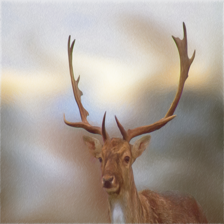

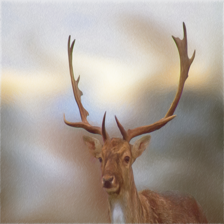

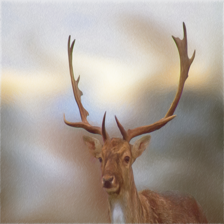

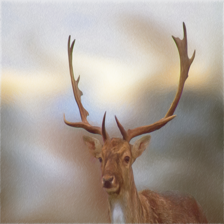

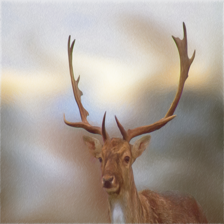

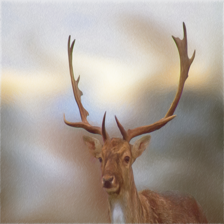

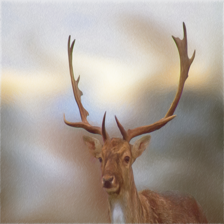

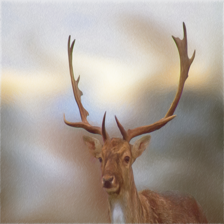

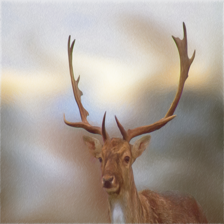

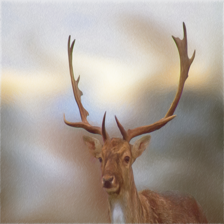

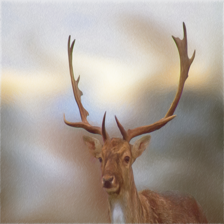

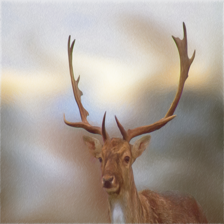

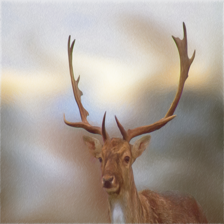

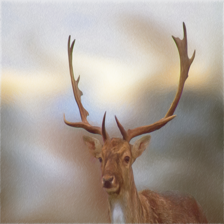

In [38]:
# Model Performance
sample_list= 'data\\val\\1.png'
from PIL import Image
import numpy as np

for image_path in sample_list:
    img = Image.open(sample_list)
    display(img.resize((224,224)))
    img_tensor = tfm(img)
    img_tensor = img_tensor[np.newaxis, :]
    img_tensor = img_tensor.to(device)
    pred_prob = model(img_tensor)
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    print("========================================================")
# mg_tensor = transform(img)
# print(mg_tensor)   

In [39]:
val_dir = 'data\\val'

def mean_std(x):
    dataset_mean_std = ImageFolder(x,transform = tfm)
    
    valloader_mean_std = DataLoader(train_ds_mean_std, batch_size=len(train_ds_mean_std), shuffle=True, num_workers = 1)
    
    images,labels = next(iter(valloader_mean_std ))
    
    mean,std = images.mean([0,2,3]), images.std([0,2,3])
    
    return mean,std

#load the train and test data

mean,std = mean_std(val_dir)

valset = ImageFolder(val_dir,transform = tfm )

FileNotFoundError: Couldn't find any class folder in data\val.